In [2]:
# Lasso regression with Neglecting features as described in Data prepration module

import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model, metrics 
  
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
    
    
import warnings
warnings.filterwarnings('ignore')
    
    
def change_to_category(name):
    set_alley = set(dataset[name])
    new_set_alley = set()
    {new_set_alley.add(x) for x in set_alley if x==x}
    dataset[name] = dataset[name].astype('category')
    dataset[name] = dataset[name].cat.reorder_categories(new_set_alley, ordered=True)
    dataset[name] = dataset[name].cat.codes
    return dataset[name]

dataset = pandas.read_csv('train.csv')

dataset['MSZoning'] = change_to_category('MSZoning')
dataset['Street'] = change_to_category('Street')
dataset['Alley'] = change_to_category('Alley')
dataset['LotShape'] = change_to_category('LotShape')
dataset['LandContour'] = change_to_category('LandContour')
dataset['Utilities'] = change_to_category('Utilities')
dataset['LotConfig'] = change_to_category('LotConfig')
dataset['LandSlope'] = change_to_category('LandSlope')
dataset['Neighborhood'] = change_to_category('Neighborhood')
dataset['Condition1'] = change_to_category('Condition1')
dataset['Condition2'] = change_to_category('Condition2')
dataset['BldgType'] = change_to_category('BldgType')
dataset['HouseStyle'] = change_to_category('HouseStyle')
dataset['RoofStyle'] = change_to_category('RoofStyle')
dataset['RoofMatl'] = change_to_category('RoofMatl')
dataset['Exterior1st'] = change_to_category('Exterior1st')
dataset['Exterior2nd'] = change_to_category('Exterior2nd')
dataset['MasVnrType'] = change_to_category('MasVnrType')
dataset['ExterQual'] = change_to_category('ExterQual')
dataset['ExterCond'] = change_to_category('ExterCond')
dataset['Foundation'] = change_to_category('Foundation')
dataset['BsmtQual'] = change_to_category('BsmtQual')
dataset['BsmtCond'] = change_to_category('BsmtCond')
dataset['BsmtExposure'] = change_to_category('BsmtExposure')
dataset['BsmtFinType1'] = change_to_category('BsmtFinType1')
dataset['BsmtFinType2'] = change_to_category('BsmtFinType2')
dataset['Heating'] = change_to_category('Heating')
dataset['HeatingQC'] = change_to_category('HeatingQC')
dataset['CentralAir'] = change_to_category('CentralAir')
dataset['Electrical'] = change_to_category('Electrical')
dataset['KitchenQual'] = change_to_category('KitchenQual')
dataset['Functional'] = change_to_category('Functional')
dataset['FireplaceQu'] = change_to_category('FireplaceQu')
dataset['GarageType'] = change_to_category('GarageType')
dataset['GarageFinish'] = change_to_category('GarageFinish')
dataset['GarageQual'] = change_to_category('GarageQual')
dataset['GarageCond'] = change_to_category('GarageCond')
dataset['PavedDrive'] = change_to_category('PavedDrive')
dataset['PoolQC'] = change_to_category('PoolQC')
dataset['Fence'] = change_to_category('Fence')
dataset['MiscFeature'] = change_to_category('MiscFeature')
dataset['SaleType'] = change_to_category('SaleType')
dataset['SaleCondition'] = change_to_category('SaleCondition')

# Neglecting features as described in Data prepration module
dataset = dataset.drop(["Id","BsmtFinSF2", "MiscVal", "3SsnPorch","ScreenPorch", "BsmtHalfBath", "PoolArea","EnclosedPorch", "LowQualFinSF"], axis=1)

X = dataset.iloc[:, 0:71]
y = dataset.iloc[:, 71]

alpha_value = 0
largest_testing_accuracy = -1
validation_accuracy = -1
training_accuracy = -1
coeff = []
accurate_alpha_value = -1
while(alpha_value < 100):
    
    steps = [
        ('scalar', StandardScaler()),
        ('model', Lasso(alpha=alpha_value, fit_intercept=True))
    ]

    pipeline = Pipeline(steps)


    #print('Training score:')

    from sklearn.model_selection import train_test_split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=42) 

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                        random_state=42) 

    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)
    y_train.fillna(0, inplace=True)
    X_val.fillna(0, inplace=True)
    y_val.fillna(0, inplace=True)
    y_test.fillna(0, inplace=True)


    pipeline.fit(X_train, y_train)
    
    testing_accuracy = pipeline.score(X_test, y_test)
    
    if(testing_accuracy > largest_testing_accuracy):
        largest_testing_accuracy = testing_accuracy
        coeff = pipeline.named_steps['model'].coef_
        validation_accuracy = pipeline.score(X_val, y_val)
        training_accuracy = pipeline.score(X_train, y_train)
        accurate_alpha_value = alpha_value
        
    alpha_value +=1

print('Training score: {}'.format(training_accuracy))
print('Validation score: {}'.format(validation_accuracy))
print('Test score: {}'.format(largest_testing_accuracy))
print('Alpha value when most accurate while testing: {}'.format(accurate_alpha_value))


Training score: 0.8304818049097229
Validation score: 0.8576624985810023
Test score: 0.8240218232550707
Alpha value when most accurate while testing: 99


In [2]:
# Ridge regression with Neglecting features as described in Data prepration module

import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model, metrics 
  
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
    
    
import warnings
warnings.filterwarnings('ignore')
    
    
def change_to_category(name):
    set_alley = set(dataset[name])
    new_set_alley = set()
    {new_set_alley.add(x) for x in set_alley if x==x}
    dataset[name] = dataset[name].astype('category')
    dataset[name] = dataset[name].cat.reorder_categories(new_set_alley, ordered=True)
    dataset[name] = dataset[name].cat.codes
    return dataset[name]

dataset = pandas.read_csv('train.csv')

dataset['MSZoning'] = change_to_category('MSZoning')
dataset['Street'] = change_to_category('Street')
dataset['Alley'] = change_to_category('Alley')
dataset['LotShape'] = change_to_category('LotShape')
dataset['LandContour'] = change_to_category('LandContour')
dataset['Utilities'] = change_to_category('Utilities')
dataset['LotConfig'] = change_to_category('LotConfig')
dataset['LandSlope'] = change_to_category('LandSlope')
dataset['Neighborhood'] = change_to_category('Neighborhood')
dataset['Condition1'] = change_to_category('Condition1')
dataset['Condition2'] = change_to_category('Condition2')
dataset['BldgType'] = change_to_category('BldgType')
dataset['HouseStyle'] = change_to_category('HouseStyle')
dataset['RoofStyle'] = change_to_category('RoofStyle')
dataset['RoofMatl'] = change_to_category('RoofMatl')
dataset['Exterior1st'] = change_to_category('Exterior1st')
dataset['Exterior2nd'] = change_to_category('Exterior2nd')
dataset['MasVnrType'] = change_to_category('MasVnrType')
dataset['ExterQual'] = change_to_category('ExterQual')
dataset['ExterCond'] = change_to_category('ExterCond')
dataset['Foundation'] = change_to_category('Foundation')
dataset['BsmtQual'] = change_to_category('BsmtQual')
dataset['BsmtCond'] = change_to_category('BsmtCond')
dataset['BsmtExposure'] = change_to_category('BsmtExposure')
dataset['BsmtFinType1'] = change_to_category('BsmtFinType1')
dataset['BsmtFinType2'] = change_to_category('BsmtFinType2')
dataset['Heating'] = change_to_category('Heating')
dataset['HeatingQC'] = change_to_category('HeatingQC')
dataset['CentralAir'] = change_to_category('CentralAir')
dataset['Electrical'] = change_to_category('Electrical')
dataset['KitchenQual'] = change_to_category('KitchenQual')
dataset['Functional'] = change_to_category('Functional')
dataset['FireplaceQu'] = change_to_category('FireplaceQu')
dataset['GarageType'] = change_to_category('GarageType')
dataset['GarageFinish'] = change_to_category('GarageFinish')
dataset['GarageQual'] = change_to_category('GarageQual')
dataset['GarageCond'] = change_to_category('GarageCond')
dataset['PavedDrive'] = change_to_category('PavedDrive')
dataset['PoolQC'] = change_to_category('PoolQC')
dataset['Fence'] = change_to_category('Fence')
dataset['MiscFeature'] = change_to_category('MiscFeature')
dataset['SaleType'] = change_to_category('SaleType')
dataset['SaleCondition'] = change_to_category('SaleCondition')

# Neglecting features as described in Data prepration module
dataset = dataset.drop(["Id","BsmtFinSF2", "MiscVal", "3SsnPorch","ScreenPorch", "BsmtHalfBath", "PoolArea","EnclosedPorch", "LowQualFinSF"], axis=1)

X = dataset.iloc[:, 0:71]
y = dataset.iloc[:, 71]

alpha_value = 0
largest_testing_accuracy = -1
validation_accuracy = -1
training_accuracy = -1
coeff = []
accurate_alpha_value = -1
while(alpha_value < 100):
    
    steps = [
        ('scalar', StandardScaler()),
        ('model', Ridge(alpha=alpha_value, fit_intercept=True))
    ]

    pipeline = Pipeline(steps)


    #print('Training score:')

    from sklearn.model_selection import train_test_split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=42) 

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                        random_state=42) 

    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)
    y_train.fillna(0, inplace=True)
    X_val.fillna(0, inplace=True)
    y_val.fillna(0, inplace=True)
    y_test.fillna(0, inplace=True)


    pipeline.fit(X_train, y_train)
    
    testing_accuracy = pipeline.score(X_test, y_test)
    
    if(testing_accuracy > largest_testing_accuracy):
        largest_testing_accuracy = testing_accuracy
        coeff = pipeline.named_steps['model'].coef_
        validation_accuracy = pipeline.score(X_val, y_val)
        training_accuracy = pipeline.score(X_train, y_train)
        accurate_alpha_value = alpha_value
    alpha_value +=1

print('Training score: {}'.format(training_accuracy))
print('Validation score: {}'.format(validation_accuracy))
print('Test score: {}'.format(largest_testing_accuracy))
print('Alpha value when most accurate while testing: {}'.format(accurate_alpha_value))

Training score: 0.8253798657876714
Validation score: 0.8603046101446923
Test score: 0.826779236943101
Alpha value when most accurate while testing: 16


Training score: 0.8372661195184667
Validation score: 0.8512492847604658
Test score: 0.8070466708445
[ -6129.53457006   1750.16757251  -2223.79840847   4791.06709959
  -1393.70422847   -653.99399283   1738.24804564  -5200.06368561
  -1635.37916563    224.90313197  -2451.81410905  -2912.77587372
  -4011.49136101  -2783.62904701   -813.95258586   3590.28797814
  18351.25444769   6265.26652963   8546.98776815   -387.61810873
  -1899.68087251   5387.36283031    175.30665155   2112.42079418
  -1801.05863981   2901.80654961   5878.89964152   -767.46379202
   -634.93756763   5214.90366675  -1952.30999698   3322.17890185
   3016.99820442  -4376.93682622  -3338.04578043  -6444.94872822
   4907.80809239    205.1545623   -1386.94773075   -220.32708293
   -418.50510671  -6832.41582429 -10426.99777235  32954.53823984
   5231.08534922   -822.83364196    865.5982153   -2547.11617508
  -2599.79208852   5708.69896857   8221.26690707   2501.45927648
   4541.76592621    383.5839448     470.95017984  -6266

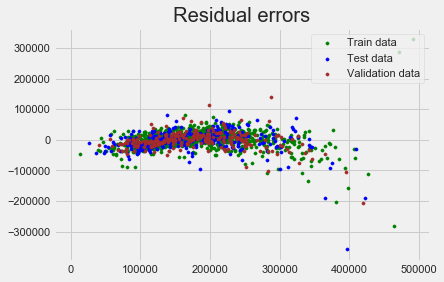

In [2]:
# Linear regression with Neglecting features as described in Data prepration module


import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model, metrics 
  
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
    
    
import warnings
warnings.filterwarnings('ignore')

def change_to_category(name):
    set_alley = set(dataset[name])
    new_set_alley = set()
    {new_set_alley.add(x) for x in set_alley if x==x}
    dataset[name] = dataset[name].astype('category')
    dataset[name] = dataset[name].cat.reorder_categories(new_set_alley, ordered=True)
    dataset[name] = dataset[name].cat.codes
    return dataset[name]

dataset = pandas.read_csv('train.csv')

dataset['MSZoning'] = change_to_category('MSZoning')
dataset['Street'] = change_to_category('Street')
dataset['Alley'] = change_to_category('Alley')
dataset['LotShape'] = change_to_category('LotShape')
dataset['LandContour'] = change_to_category('LandContour')
dataset['Utilities'] = change_to_category('Utilities')
dataset['LotConfig'] = change_to_category('LotConfig')
dataset['LandSlope'] = change_to_category('LandSlope')
dataset['Neighborhood'] = change_to_category('Neighborhood')
dataset['Condition1'] = change_to_category('Condition1')
dataset['Condition2'] = change_to_category('Condition2')
dataset['BldgType'] = change_to_category('BldgType')
dataset['HouseStyle'] = change_to_category('HouseStyle')
dataset['RoofStyle'] = change_to_category('RoofStyle')
dataset['RoofMatl'] = change_to_category('RoofMatl')
dataset['Exterior1st'] = change_to_category('Exterior1st')
dataset['Exterior2nd'] = change_to_category('Exterior2nd')
dataset['MasVnrType'] = change_to_category('MasVnrType')
dataset['ExterQual'] = change_to_category('ExterQual')
dataset['ExterCond'] = change_to_category('ExterCond')
dataset['Foundation'] = change_to_category('Foundation')
dataset['BsmtQual'] = change_to_category('BsmtQual')
dataset['BsmtCond'] = change_to_category('BsmtCond')
dataset['BsmtExposure'] = change_to_category('BsmtExposure')
dataset['BsmtFinType1'] = change_to_category('BsmtFinType1')
dataset['BsmtFinType2'] = change_to_category('BsmtFinType2')
dataset['Heating'] = change_to_category('Heating')
dataset['HeatingQC'] = change_to_category('HeatingQC')
dataset['CentralAir'] = change_to_category('CentralAir')
dataset['Electrical'] = change_to_category('Electrical')
dataset['KitchenQual'] = change_to_category('KitchenQual')
dataset['Functional'] = change_to_category('Functional')
dataset['FireplaceQu'] = change_to_category('FireplaceQu')
dataset['GarageType'] = change_to_category('GarageType')
dataset['GarageFinish'] = change_to_category('GarageFinish')
dataset['GarageQual'] = change_to_category('GarageQual')
dataset['GarageCond'] = change_to_category('GarageCond')
dataset['PavedDrive'] = change_to_category('PavedDrive')
dataset['PoolQC'] = change_to_category('PoolQC')
dataset['Fence'] = change_to_category('Fence')
dataset['MiscFeature'] = change_to_category('MiscFeature')
dataset['SaleType'] = change_to_category('SaleType')
dataset['SaleCondition'] = change_to_category('SaleCondition')

# Neglecting features as described in Data prepration module
dataset = dataset.drop(["Id","BsmtFinSF2", "MiscVal", "3SsnPorch","ScreenPorch", "BsmtHalfBath", "PoolArea","EnclosedPorch", "LowQualFinSF"], axis=1)

X = dataset.iloc[:, 0:71]
y = dataset.iloc[:, 71]

steps = [
    ('scalar', StandardScaler()),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)


#print('Training score:')

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42) 
 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                    random_state=42) 
      
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)
y_val.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)


pipeline.fit(X_train, y_train)
print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Validation score: {}'.format(pipeline.score(X_val, y_val)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))
print(pipeline.named_steps['model'].coef_)

# # plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(pipeline.predict(X_train), pipeline.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(pipeline.predict(X_test), pipeline.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting residual errors in test data 
plt.scatter(pipeline.predict(X_val), pipeline.predict(X_val) - y_val, 
            color = "brown", s = 10, label = 'Validation data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 